<a href="https://colab.research.google.com/github/snow-white2024/AIFFEL_quest_cr/blob/master/250403_%EB%8D%94%EB%AF%B8%EC%9D%8C%EC%84%B1%EC%83%9D%EC%84%B1%ED%9B%84%EB%AA%A8%EB%8D%B8%ED%95%99%EC%8A%B5(50%2CCNN_%2B_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gtts pydub
!apt-get install -y ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


# 👉 TTS 패키지를 이용한 더미데이터 생성

In [43]:
import shutil
import os

# 삭제할 폴더 경로
exercise_path = "exercise_audio"
normal_path = "normal_audio"

# 기존 폴더 삭제
shutil.rmtree(exercise_path, ignore_errors=True)
shutil.rmtree(normal_path, ignore_errors=True)

# 다시 폴더 생성
os.makedirs(exercise_path, exist_ok=True)
os.makedirs(normal_path, exist_ok=True)

print("✅ 기존 음성 파일 삭제 완료! 새로운 파일을 생성하세요.")


✅ 기존 음성 파일 삭제 완료! 새로운 파일을 생성하세요.


In [45]:
#더미데이터 생성기 테스트3

from gtts import gTTS
from pydub import AudioSegment
import os
import random

# 저장할 폴더 생성
os.makedirs("exercise_audio", exist_ok=True)
os.makedirs("normal_audio", exist_ok=True)

# 기본 문장
base_text = "지금은 VT테스트 중 입니다."

# 운동 중 문장 변형
exercise_variations = [
    "지금... 하아... 헉헉... VT테스트 중...입니다... 하아...",
    "헉...헉... 지금은... 하아... VT테스트... 중... 입니다...",
    "하아... 하아... 헉... 지금... VT테스트 중...입니다...",
    "하아...헉...헉... VT테스트...중입니다... 힘드네요...",
    "헉...하아... 헉... 지금은... VT테스트... 중입니다...",
    "후...후... 지금은... VT테스트 중... 후...",
    "하아... 조금만 더... VT테스트... 후... 후...",
]

# 평소 문장 변형 (실제 톤 반영)
normal_variations = [
    "지금은 VT테스트 중입니다.",
    "지금은 VT테스트 중입니다~",  # 부드러운 톤
    "지금은 VT테스트 중입니다!",  # 강조
    "지금은 VT테스트 중입니다...",  # 차분한 톤
    "지금은... VT테스트 중이에요.",  # 약간 느리게, 부드러운 톤
    "지금은 VT테스트 중입니다.",  # 밝은 느낌
    "지금은 VT테스트 중이랍니다.",  # 친근한 느낌
]

# 50개의 운동 중/평소 파일 생성
for i in range(50):
    # 🎤 문장 선택
    exercise_text = random.choice(exercise_variations)
    normal_text = random.choice(normal_variations)

    # Google TTS 음성 생성
    tts_exercise = gTTS(text=exercise_text, lang='ko')
    tts_normal = gTTS(text=normal_text, lang='ko')

    # MP3 파일로 임시 저장
    exercise_mp3_path = f"exercise_audio/vt_test_exercise_{i+1}.mp3"
    normal_mp3_path = f"normal_audio/vt_test_normal_{i+1}.mp3"

    tts_exercise.save(exercise_mp3_path)
    tts_normal.save(normal_mp3_path)

    # 🔄 MP3 → WAV 변환
    sound_exercise = AudioSegment.from_mp3(exercise_mp3_path)
    sound_normal = AudioSegment.from_mp3(normal_mp3_path)

    # 🎵 운동 중 음성 조정 (속도, 피치, 볼륨)
    speed = random.uniform(1.3, 1.7)  # 속도 1.3배 ~ 1.7배
    pitch = random.uniform(-2.0, 2.0)  # 피치 조정
    volume = random.uniform(-5.0, 5.0)  # 볼륨 조정

    fast_exercise = sound_exercise.speedup(playback_speed=speed)
    fast_exercise = fast_exercise + volume  # 볼륨 조정
    fast_exercise = fast_exercise.set_frame_rate(int(sound_exercise.frame_rate * (1 + pitch / 10)))  # 피치 조정

    # 🎵 평소 음성도 랜덤 조정 (속도, 피치)
    normal_speed = random.uniform(0.9, 1.2)  # 0.9배 ~ 1.2배
    normal_pitch = random.uniform(-2.5, 2.5)  # 피치 변화
    normal_variation = sound_normal.speedup(playback_speed=normal_speed)
    normal_variation = normal_variation.set_frame_rate(int(sound_normal.frame_rate * (1 + normal_pitch / 10)))

    # 변환된 WAV 파일 저장
    exercise_wav_path = f"exercise_audio/vt_test_exercise_{i+1}.wav"
    normal_wav_path = f"normal_audio/vt_test_normal_{i+1}.wav"

    fast_exercise.export(exercise_wav_path, format="wav")
    normal_variation.export(normal_wav_path, format="wav")

    print(f"🎤 생성 완료! 운동 중: {exercise_wav_path}, 평소: {normal_wav_path}")

print("✅ 모든 WAV 파일 생성 완료! (총 100개)")


🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_1.wav, 평소: normal_audio/vt_test_normal_1.wav
🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_2.wav, 평소: normal_audio/vt_test_normal_2.wav
🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_3.wav, 평소: normal_audio/vt_test_normal_3.wav
🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_4.wav, 평소: normal_audio/vt_test_normal_4.wav
🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_5.wav, 평소: normal_audio/vt_test_normal_5.wav
🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_6.wav, 평소: normal_audio/vt_test_normal_6.wav
🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_7.wav, 평소: normal_audio/vt_test_normal_7.wav
🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_8.wav, 평소: normal_audio/vt_test_normal_8.wav
🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_9.wav, 평소: normal_audio/vt_test_normal_9.wav
🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_10.wav, 평소: normal_audio/vt_test_normal_10.wav
🎤 생성 완료! 운동 중: exercise_audio/vt_test_exercise_11.wav, 평소: normal_audio/vt_tes

In [49]:
import IPython.display as ipd

# 예제: 운동 중 음성 듣기
#ipd.Audio("exercise_audio/vt_test_exercise_8.wav")

# 예제: 평소 음성 듣기
ipd.Audio("normal_audio/vt_test_normal_34.wav")


In [10]:
from google.colab import files

# 예제: 운동 중 파일 중 하나 다운로드
#files.download("exercise_audio/vt_test_exercise_1.wav")

# 예제: 평소 음성 파일 중 하나 다운로드
files.download("normal_audio/vt_test_normal_1.wav")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 샘플 음성 데이터 특징 추출 (MFCC 특징 추출)

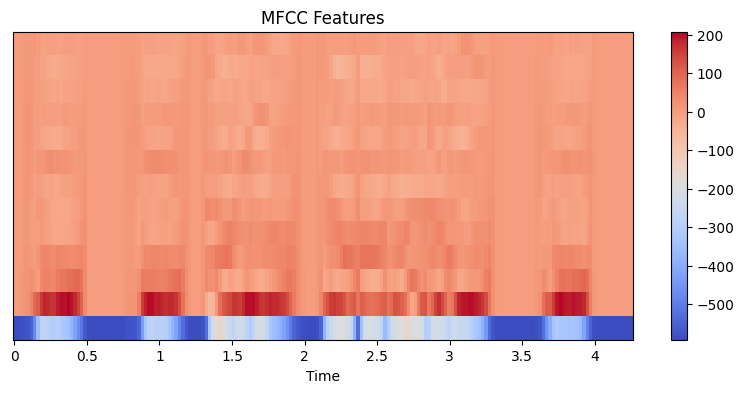

In [50]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 샘플 음성 파일 로드
wav_path = "exercise_audio/vt_test_exercise_1.wav"
y, sr = librosa.load(wav_path, sr=22050)

# MFCC 특징 추출
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.title("MFCC Features")
plt.show()


# 음성 데이터를 라벨링하여 학습 데이터셋 만들기

In [54]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # 데이터 분할

# 🔹 MFCC 특징 벡터 추출 함수
def extract_mfcc_features(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=22050)  # 음성 파일 로드
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # MFCC 특징 추출
    return np.mean(mfccs, axis=1)  # MFCC 평균값 사용

data = []
labels = []

# 🔹 운동 중 음성 데이터 (라벨 1)
for file in os.listdir("exercise_audio"):
    if file.endswith(".wav"):
        file_path = os.path.join("exercise_audio", file)
        features = extract_mfcc_features(file_path)
        data.append(features)
        labels.append(1)  # 운동 중 → 라벨 1

# 🔹 평소 음성 데이터 (라벨 0)
for file in os.listdir("normal_audio"):
    if file.endswith(".wav"):
        file_path = os.path.join("normal_audio", file)
        features = extract_mfcc_features(file_path)
        data.append(features)
        labels.append(0)  # 평소 → 라벨 0

# 🔹 NumPy 배열 변환
X = np.array(data)
y = np.array(labels)

# 🔹 훈련(70%), 검증(15%), 테스트(15%)로 나누기
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 🔹 데이터셋을 CSV 파일로 저장
df_train = pd.DataFrame(X_train)
df_train["label"] = y_train
df_train.to_csv("train_dataset.csv", index=False)

df_val = pd.DataFrame(X_val)
df_val["label"] = y_val
df_val.to_csv("val_dataset.csv", index=False)

df_test = pd.DataFrame(X_test)
df_test["label"] = y_test
df_test.to_csv("test_dataset.csv", index=False)

print("✅ 훈련/검증/테스트 데이터셋 분할 완료!")


✅ 훈련/검증/테스트 데이터셋 분할 완료!


# 딥러닝 모델 선택 및 학습(간단한 CNN + LSTM 모델 예제 (Keras 사용))

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# 모델 초기화 후 가중치 리셋
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    LSTM(64, return_sequences=True),
    LSTM(32),

    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # 이진 분류 (운동 중 vs 평소)
])

# **여기서 가중치 초기화!**
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 모델을 처음 사용할 때 가중치 초기화
model.build(input_shape=(None, X_train.shape[1], 1))

print("✅ CNN + LSTM 모델이 준비되었습니다! (가중치 초기화 완료)")


✅ CNN + LSTM 모델이 준비되었습니다! (가중치 초기화 완료)


In [58]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

# 입력 데이터 차원 변경 (LSTM은 3D 입력 필요)
X_train = np.expand_dims(X_train, axis=-1)  # (batch_size, timesteps, features)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# 조기 종료 콜백 설정 (과적합 방지)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,   # 🔹 총 30 epoch 학습
    batch_size=32,  # 🔹 배치 크기 32
    callbacks=[early_stopping, checkpoint]
)

# 학습 완료 후 모델 저장
model.save("final_model.h5")

print("✅ 모델 학습 완료 및 저장됨!")


Epoch 1/30
1/3 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.4688 - loss: 0.6966

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 407ms/step - accuracy: 0.5396 - loss: 0.6879 - val_accuracy: 0.4667 - val_loss: 0.6902
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8804 - loss: 0.6492 - val_accuracy: 0.4667 - val_loss: 0.6969
Epoch 3/30
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9688 - loss: 0.6137

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9669 - loss: 0.6103 - val_accuracy: 0.4667 - val_loss: 0.6853
Epoch 4/30
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 1.0000 - loss: 0.5701

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9890 - loss: 0.5722 - val_accuracy: 0.4667 - val_loss: 0.6717
Epoch 5/30
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9688 - loss: 0.5334

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9811 - loss: 0.5282 - val_accuracy: 0.4667 - val_loss: 0.6532
Epoch 6/30
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.4707

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9890 - loss: 0.4764 - val_accuracy: 0.4000 - val_loss: 0.6265
Epoch 7/30
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.4465

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.4293 - val_accuracy: 0.4000 - val_loss: 0.6041
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.3620 - val_accuracy: 0.4000 - val_loss: 0.6238
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.3075 - val_accuracy: 0.4667 - val_loss: 0.6668
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.2725 - val_accuracy: 0.4667 - val_loss: 0.7094
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.2116 - val_accuracy: 0.4667 - val_loss: 0.7538
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.1703 - val_accuracy: 0.4667 - val_loss: 0.8402


✅ 모델 학습 완료 및 저장됨!


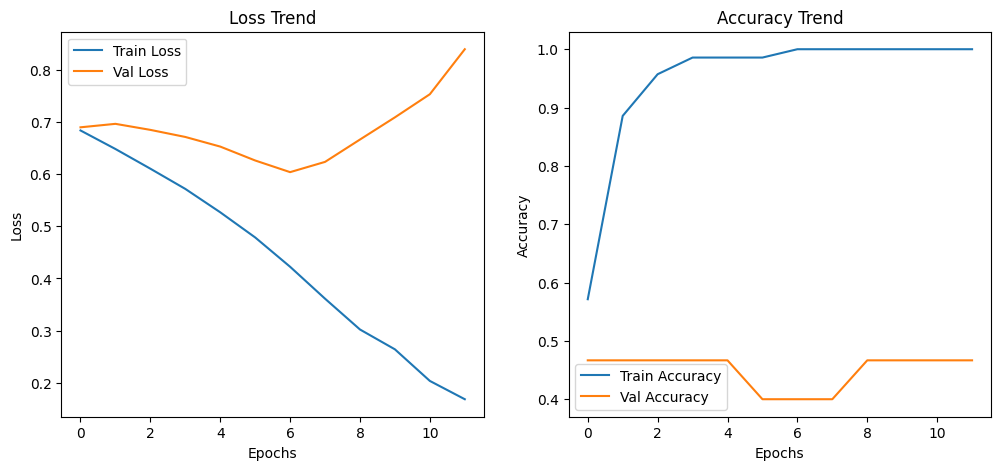

In [59]:
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Trend")

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Trend")

plt.show()


# 테스트데이터 확인

In [60]:
# 테스트 데이터 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print(f"📝 테스트 데이터 성능: \n🔹 Loss: {test_loss:.4f} \n🔹 Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4667 - loss: 0.6081
📝 테스트 데이터 성능: 
🔹 Loss: 0.6081 
🔹 Accuracy: 0.4667


In [61]:
# 예측 수행
y_pred = model.predict(X_test)

# 이진 분류이므로 0.5를 기준으로 0(평소) 또는 1(운동 중)으로 변환
y_pred_labels = (y_pred > 0.5).astype(int)

# 예측 결과 출력
print("🎯 예측 결과 샘플 10개:")
for i in range(10):
    print(f"실제: {y_test[i]} | 예측: {y_pred_labels[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
🎯 예측 결과 샘플 10개:
실제: 0 | 예측: [0]
실제: 1 | 예측: [0]
실제: 1 | 예측: [0]
실제: 0 | 예측: [0]
실제: 1 | 예측: [1]
실제: 1 | 예측: [0]
실제: 1 | 예측: [0]
실제: 0 | 예측: [0]
실제: 0 | 예측: [0]
실제: 0 | 예측: [0]


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 성능 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

# 결과 출력
print(f"📊 모델 평가 지표:")
print(f"🔹 정확도(Accuracy): {accuracy:.4f}")
print(f"🔹 정밀도(Precision): {precision:.4f}")
print(f"🔹 재현율(Recall): {recall:.4f}")
print(f"🔹 F1-score: {f1:.4f}")


📊 모델 평가 지표:
🔹 정확도(Accuracy): 0.4667
🔹 정밀도(Precision): 1.0000
🔹 재현율(Recall): 0.1111
🔹 F1-score: 0.2000


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canv

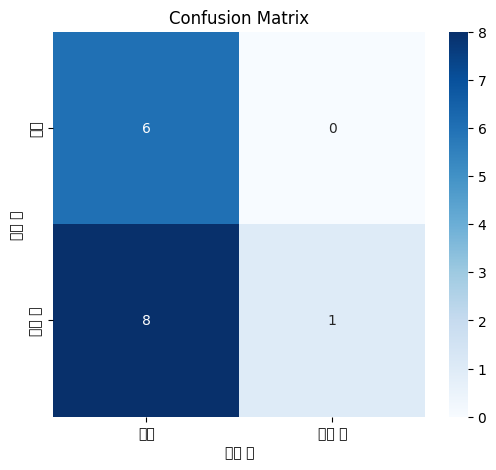

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred_labels)

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["평소", "운동 중"], yticklabels=["평소", "운동 중"])
plt.xlabel("예측 값")
plt.ylabel("실제 값")
plt.title("Confusion Matrix")
plt.show()
